### 데이터 분석 프로세스
1. 데이터 로드
2. 데이터 구조 파악 (shape, dtpyes, info)
3. 기초 통계 확인 (describe)
4. 결측치 확인 및 처리
5. 이상치 확인
6. 시각화를 통한 패턴 발견

### Pandas 핵심 함수
* df.head(), df.tail(): 데이터 일부 미리보기
* df.info(): 컬럼 정보, 결측치 확인
* df.describe(): 기술 통계량
* df.isnull().sum(): 결측치 개수
* df.groupby(): 그룹별 집계
* df.corr(): 상관계수 행렬

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
import matplotlib as mpl

mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

In [17]:
# 1. 데이터 생성 - 학생 성적 데이터
np.random.seed(42)

n_students = 200
df = pd.DataFrame({
    '학번': range(1, n_students + 1),
    '성별': np.random.choice(['남', '여'], n_students),
    '학년': np.random.choice([1, 2, 3, 4], n_students),
    '전공': np.random.choice(['컴공', '경영', '디자인'], n_students),
    '수학': np.random.normal(75, 15, n_students),
    '영어': np.random.normal(70, 20, n_students),
    '프로그래밍': np.random.normal(80, 12, n_students),
    '출석률': np.random.uniform(60, 100, n_students),
    '과제제출률': np.random.uniform(50, 100, n_students)
})

# 일부 데이터에 결측치 추가
df.loc[np.random.choice(df.index, 10), '수학'] = np.nan
df.loc[np.random.choice(df.index, 5), '영어'] = np.nan

In [21]:
# 2. 데이터 구조 파악
print("=" * 50)
print("1. 데이터 미리보기")
print("=" * 50)
print(df.head(10))

print("\n" + "=" * 50)
print("2. 데이터 정보")
print("=" * 50)
print(df.info())

print("\n" + "=" * 50)
print("3. 기초 통계량")
print("=" * 50)
print(df.describe())

1. 데이터 미리보기
   학번 성별  학년   전공         수학          영어      프로그래밍        출석률      과제제출률
0   1  남   3  디자인  61.096043  109.294503  73.116056  68.952705  77.379619
1   2  여   4   컴공  74.107120   70.705271  73.437693  81.478977  90.864888
2   3  남   3   경영  26.380990   56.005490  79.606961  83.717597  72.615914
3   4  남   1   경영  59.634185   74.279598  73.478903  83.203448  82.178885
4   5  남   4  디자인  71.211478   67.753439  71.445851  63.659473  76.320133
5   6  여   1   경영  56.283252   65.580608  81.277163  95.098435  86.579476
6   7  남   4   컴공  99.486170   82.283334  76.940273  70.624002  54.081499
7   8  남   4  디자인  53.547879   85.150154  98.047916  65.180597  53.017604
8   9  남   2   컴공  68.399333   59.389977  48.188362  95.549923  62.355162
9  10  여   1   컴공  76.961109   58.483635  93.098082  98.226060  57.977234

2. 데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  ---------


4. 결측치 확인
학번        0
성별        0
학년        0
전공        0
수학       10
영어        5
프로그래밍     0
출석률       0
과제제출률     0
dtype: int64


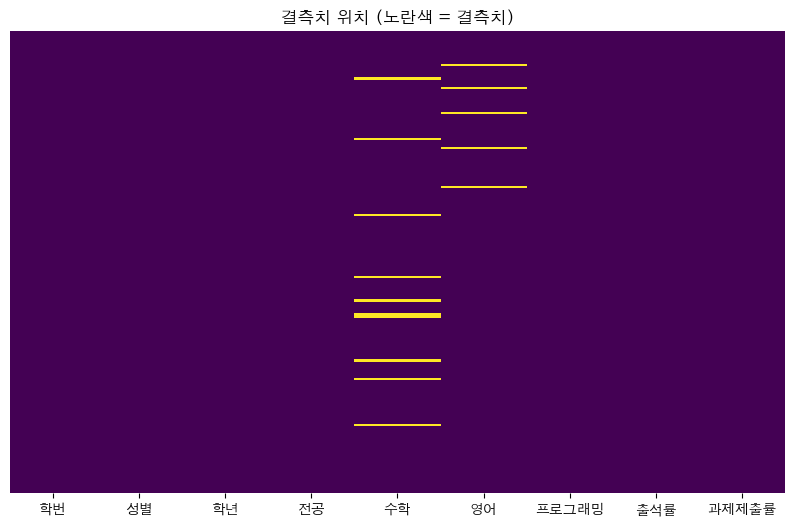

In [22]:
# 3. 결측치 확인
print("\n" + "=" * 50)
print("4. 결측치 확인")
print("=" * 50)
print(df.isnull().sum())

# 결측치 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('결측치 위치 (노란색 = 결측치)')
plt.show()

In [23]:
# 4. 결측치 처리
print("\n결측치 처리 전 수학 점수 평균:", df['수학'].mean())

# 방법 1: 평균으로 대체
df_filled_mean = df.copy()
df_filled_mean['수학'].fillna(df['수학'].mean(), inplace=True)
print("평균 대체 후 수학 점수 평균:", df_filled_mean['수학'].mean())

# 방법 2: 중앙값으로 대체 (이상치가 있을 때 더 안전)
df_filled_median = df.copy()
df_filled_median['수학'].fillna(df['수학'].median(), inplace=True)

# 방법 3: 결측치 제거
df_dropped = df.dropna()
print(f"결측치 제거 후 데이터 개수: {len(df_dropped)} (원본: {len(df)})")

# 이후 분석에서는 중앙값 대체 사용
df = df_filled_median


결측치 처리 전 수학 점수 평균: 75.1569714525986
평균 대체 후 수학 점수 평균: 75.1569714525986
결측치 제거 후 데이터 개수: 185 (원본: 200)


/var/folders/q4/tvykl81x2jd2r5qwc9tk8vr00000gn/T/ipykernel_2544/788669160.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled_mean['수학'].fillna(df['수학'].mean(), inplace=True)
/var/folders/q4/tvykl81x2jd2r5qwc9tk8vr00000gn/T/ipykernel_2544/788669160.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [24]:
# 5. 그룹별 분석
print("\n" + "=" * 50)
print("5. 그룹별 분석")
print("=" * 50)

# 전공별 평균 점수
print("\n전공별 평균 점수:")
subject_cols = ['수학', '영어', '프로그래밍']
print(df.groupby('전공')[subject_cols].mean())

# 성별별 평균 점수
print("\n성별별 평균 점수:")
print(df.groupby('성별')[subject_cols].mean())

# 학년별 평균 점수
print("\n학년별 평균 점수:")
print(df.groupby('학년')[subject_cols].mean())


5. 그룹별 분석

전공별 평균 점수:
            수학         영어      프로그래밍
전공                                  
경영   73.219318  70.379625  77.575742
디자인  75.443510  68.977270  81.898561
컴공   76.941156  68.422980  81.305676

성별별 평균 점수:
           수학         영어      프로그래밍
성별                                 
남   75.177185  70.365098  80.498123
여   75.119550  68.260608  79.734250

학년별 평균 점수:
           수학         영어      프로그래밍
학년                                 
1   74.102465  69.456051  79.899046
2   74.865047  68.133181  81.182203
3   76.932589  74.196679  80.933591
4   74.711826  65.879821  78.921580



6. 상관관계 분석
             수학        영어     프로그래밍       출석률     과제제출률
수학     1.000000  0.013046 -0.003863  0.084757  0.035174
영어     0.013046  1.000000  0.132525 -0.081770 -0.055324
프로그래밍 -0.003863  0.132525  1.000000 -0.060646  0.108818
출석률    0.084757 -0.081770 -0.060646  1.000000  0.023044
과제제출률  0.035174 -0.055324  0.108818  0.023044  1.000000


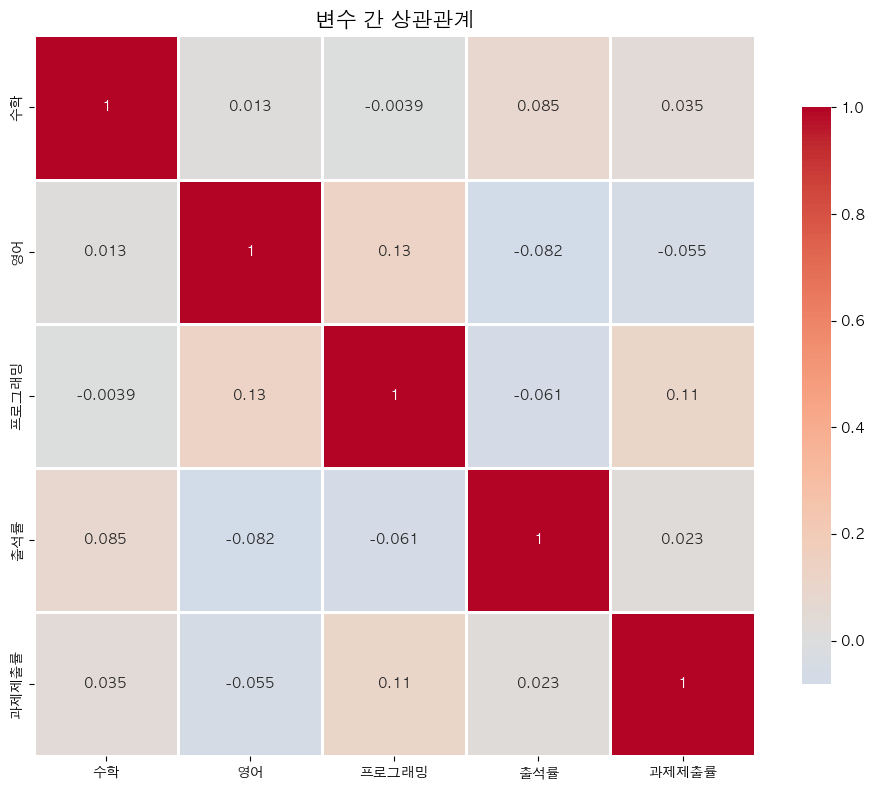

In [25]:
# 6. 상관관계 분석
print("\n" + "=" * 50)
print("6. 상관관계 분석")
print("=" * 50)

correlation_cols = ['수학', '영어', '프로그래밍', '출석률', '과제제출률']
correlation_matrix = df[correlation_cols].corr()
print(correlation_matrix)

# 상관계수 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('변수 간 상관관계', fontsize=15)
plt.tight_layout()
plt.show()

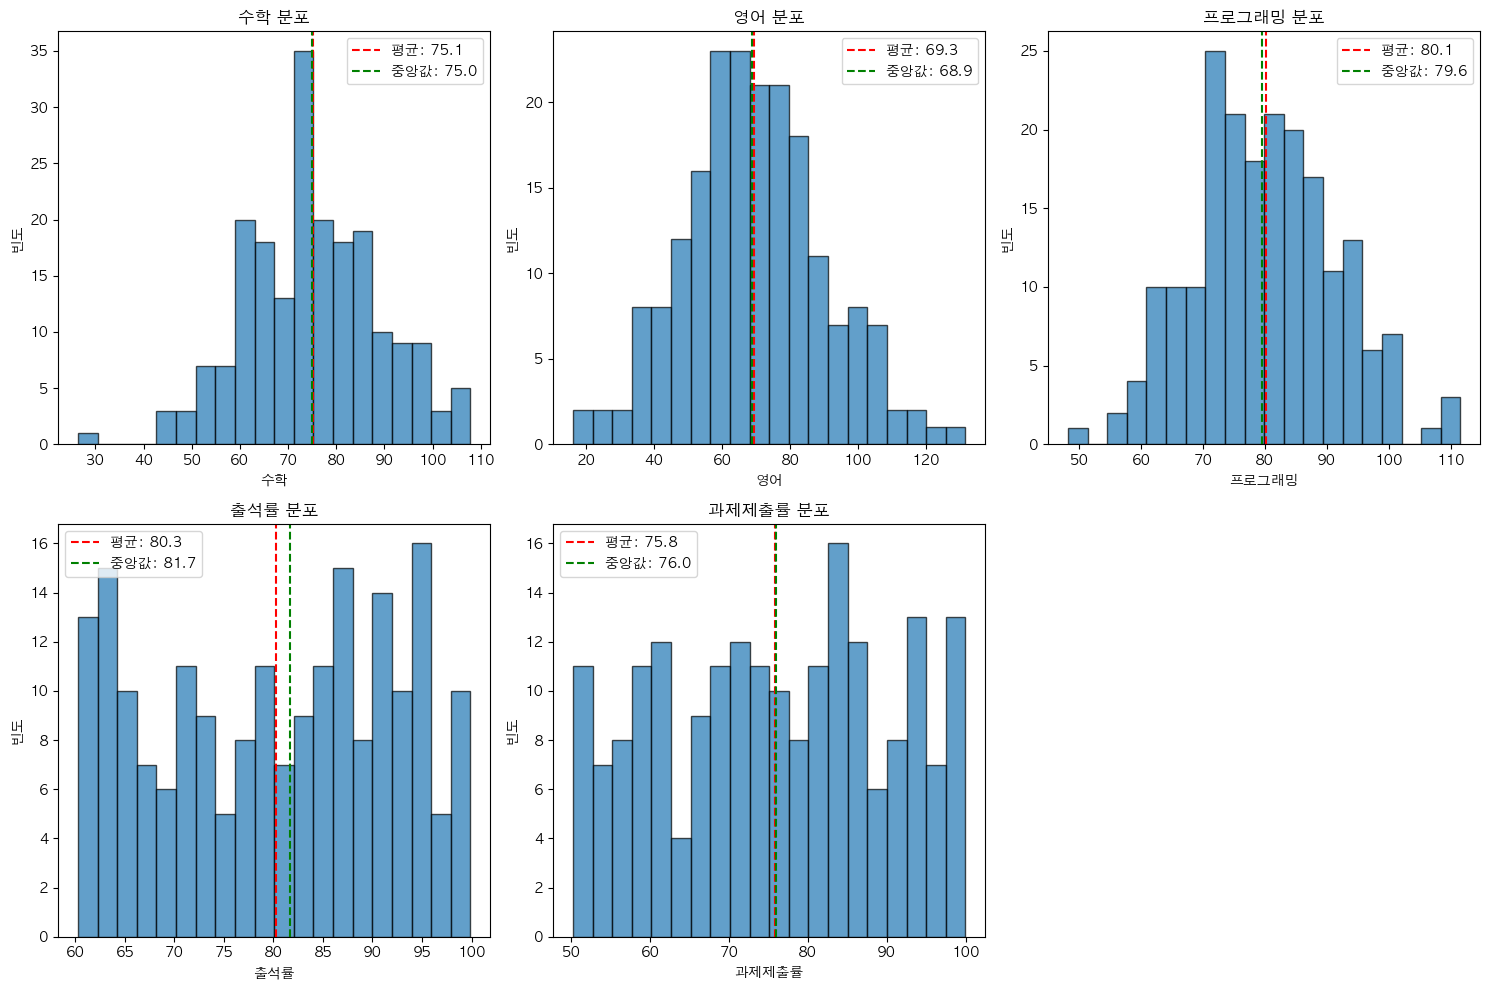

In [26]:
# 7. 분포 시각화
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for idx, col in enumerate(subject_cols + ['출석률', '과제제출률']):
    row = idx // 3
    col_idx = idx % 3

    axes[row, col_idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7)
    axes[row, col_idx].axvline(df[col].mean(), color='r', linestyle='--',
                                label=f'평균: {df[col].mean():.1f}')
    axes[row, col_idx].axvline(df[col].median(), color='g', linestyle='--',
                                label=f'중앙값: {df[col].median():.1f}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('빈도')
    axes[row, col_idx].set_title(f'{col} 분포')
    axes[row, col_idx].legend()

# 6번째 subplot은 비워두기
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

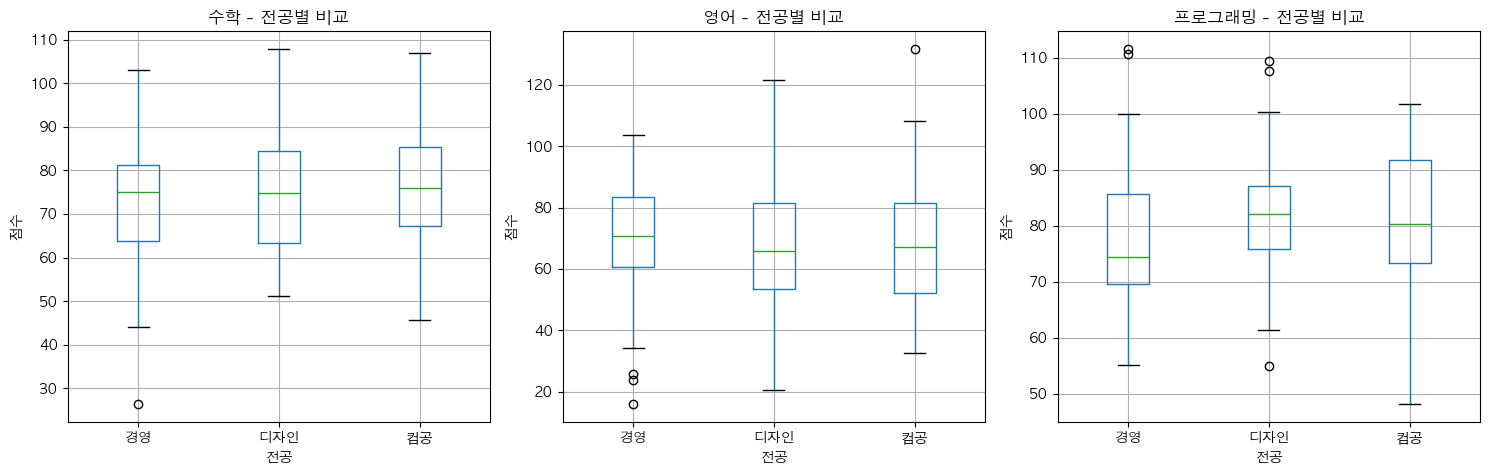

In [27]:
# 8. 전공별 성적 분포 비교
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, subject in enumerate(subject_cols):
    df.boxplot(column=subject, by='전공', ax=axes[idx])
    axes[idx].set_title(f'{subject} - 전공별 비교')
    axes[idx].set_xlabel('전공')
    axes[idx].set_ylabel('점수')

plt.suptitle('')  # 기본 제목 제거
plt.tight_layout()
plt.show()

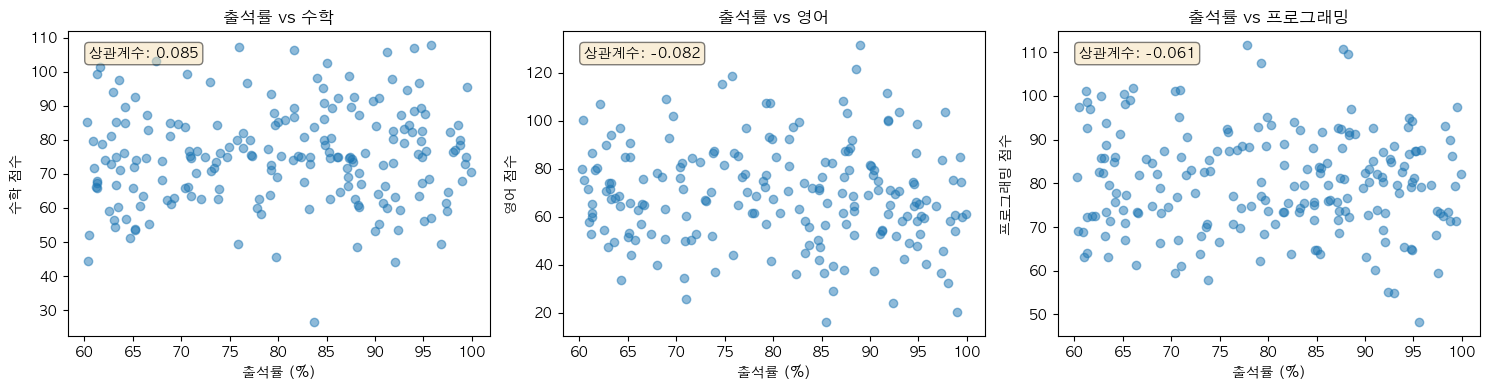

In [28]:
# 9. 출석률과 성적의 관계
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, subject in enumerate(subject_cols):
    axes[idx].scatter(df['출석률'], df[subject], alpha=0.5)
    axes[idx].set_xlabel('출석률 (%)')
    axes[idx].set_ylabel(f'{subject} 점수')
    axes[idx].set_title(f'출석률 vs {subject}')

    # 상관계수 표시
    corr = df[['출석률', subject]].corr().iloc[0, 1]
    axes[idx].text(0.05, 0.95, f'상관계수: {corr:.3f}',
                   transform=axes[idx].transAxes,
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

In [29]:
# 10. 종합 리포트 생성
print("\n" + "=" * 50)
print("종합 분석 리포트")
print("=" * 50)

report = f"""
전체 학생 수: {len(df)}명

【 과목별 평균 점수 】
수학: {df['수학'].mean():.1f}점 (표준편차: {df['수학'].std():.1f})
영어: {df['영어'].mean():.1f}점 (표준편차: {df['영어'].std():.1f})
프로그래밍: {df['프로그래밍'].mean():.1f}점 (표준편차: {df['프로그래밍'].std():.1f})

【 출석 및 과제 】
평균 출석률: {df['출석률'].mean():.1f}%
평균 과제제출률: {df['과제제출률'].mean():.1f}%

【 전공별 학생 수 】
{df['전공'].value_counts().to_string()}

【 주요 발견사항 】
1. 가장 높은 평균 점수 과목: {df[subject_cols].mean().idxmax()}
2. 가장 낮은 평균 점수 과목: {df[subject_cols].mean().idxmin()}
3. 가장 성적 편차가 큰 과목: {df[subject_cols].std().idxmax()}
4. 출석률과 가장 상관관계 높은 과목: {df[['출석률'] + subject_cols].corr()['출석률'][1:].idxmax()}
"""

print(report)


종합 분석 리포트

전체 학생 수: 200명

【 과목별 평균 점수 】
수학: 75.1점 (표준편차: 14.1)
영어: 69.3점 (표준편차: 20.6)
프로그래밍: 80.1점 (표준편차: 11.5)

【 출석 및 과제 】
평균 출석률: 80.3%
평균 과제제출률: 75.8%

【 전공별 학생 수 】
전공
경영     73
컴공     69
디자인    58

【 주요 발견사항 】
1. 가장 높은 평균 점수 과목: 프로그래밍
2. 가장 낮은 평균 점수 과목: 영어
3. 가장 성적 편차가 큰 과목: 영어
4. 출석률과 가장 상관관계 높은 과목: 수학

